# Census Income

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_income = pd.read_csv(r"C:\Users\manish\Downloads\adult.csv")

In [3]:
df_income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Columns included in the dataset:

- Age : continuous.
- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous - represents final weight, which is the number of units in the target population that the responding unit represents.
- Education : Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-  4th, 10th, Doctorate, 5th-6th.
- Education Number : continuous - number of years of education in total, which is a continuous representation of the discrete variable education.
- Martial Status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm- clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- Relationship : Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- Race : White, Asian-Pac-Islander, Amer-Indian-Eskimo,Black, other.
- Sex: Female, Male.
- Capital Gain : Continuous.
- Capital Loss : Continuous.
- Hours per week : Working hours per week(continuous)
- Native Country : United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican- Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El- Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [4]:
df_income.shape

(32561, 15)

In [7]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_income)
profile

C:\Users\manish\Anaconda3\envs\tensorflow1\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,15
Number of observations,32561
Total Missing (%),0.0%
Total size in memory,3.7 MiB
Average record size in memory,120.0 B
Numeric,6
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [6]:
df = df_income.drop('fnlwgt',axis = 1)

In [7]:
df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


### Checking null values

In [9]:
df.isnull().sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(29096, 14)

In [12]:
category_col = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country','income']
for c in category_col:
    print(c)
    print(df[c].value_counts())

workclass
Private             19621
Self-emp-not-inc     2473
Local-gov            2040
?                    1632
State-gov            1272
Self-emp-inc         1091
Federal-gov           946
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
education
HS-grad         8886
Some-college    6378
Bachelors       4810
Masters         1653
Assoc-voc       1331
11th            1056
Assoc-acdm      1053
10th             867
7th-8th          629
Prof-school      566
9th              507
12th             414
Doctorate        402
5th-6th          328
1st-4th          166
Preschool         50
Name: education, dtype: int64
marital.status
Married-civ-spouse       13249
Never-married             9173
Divorced                  4237
Separated                 1014
Widowed                    982
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
occupation
Prof-specialty       3885
Exec-managerial      3719
Adm-clerical        

In [13]:
col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isin(["?"]).sum()
    if num_non>0:
        print("Total number of ? in ",c, " is ",num_non)
        print(num_non/num_data*100)
        #print(num_non)

Total number of ? in  workclass  is  1632
5.609018421776189
Total number of ? in  occupation  is  1639
5.633076711575474
Total number of ? in  native.country  is  580
1.9934011547979105


In [14]:
df = df[df['workclass']!='?']
df = df[df['occupation']!= '?']
df = df[df['native.country']!='?']

In [15]:
df.shape

(26904, 14)

In [16]:
df['income'].value_counts()

<=50K    20024
>50K      6880
Name: income, dtype: int64

### Data Visualisation

### Plotting of numeric attributes

- income
- age
- education.num  
- hours.per.week 

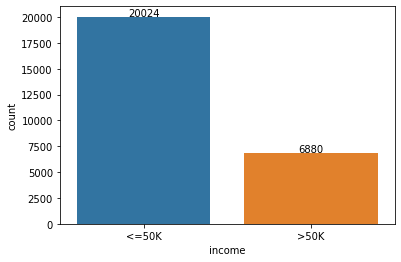

In [28]:
total = float(len(df))
ax = sns.countplot(df['income'],label = 'count')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.0f}'.format(height),
            ha="center") 


The maximum age is 90
The minimum age is 17
The average age is 39.0


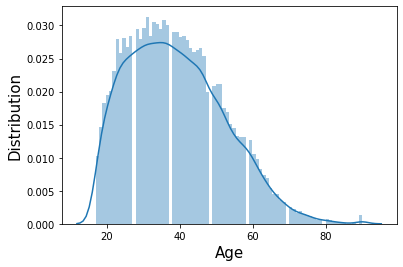

In [17]:
sns.distplot(df['age'], bins = 80)
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)

print ("The maximum age is", df['age'].max())
print ("The minimum age is", df['age'].min())
print("The average age is", round(df['age'].mean(),0))

posx and posy should be finite values
posx and posy should be finite values


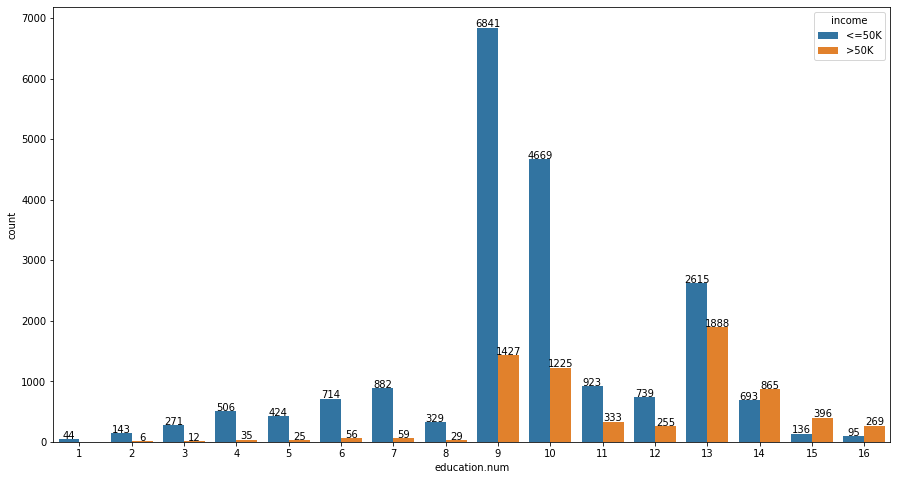

In [30]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df['education.num'], hue=df['income'])
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.0f}'.format(height),
            ha="center") 

### Categorical plotting

- workclass
- sex
- education
- marital.status

posx and posy should be finite values
posx and posy should be finite values


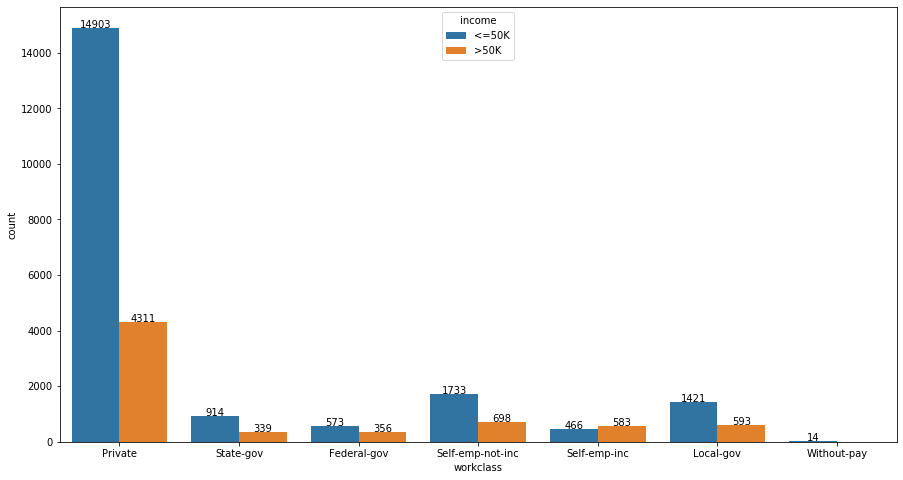

In [33]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df['workclass'], hue=df['income'])
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.0f}'.format(height),
            ha="center") 

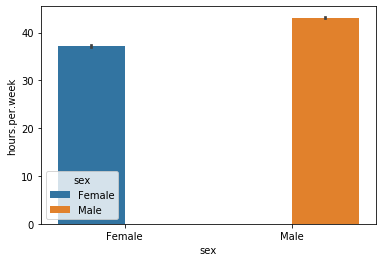

In [36]:
ax = sns.barplot(x = df['sex'], y = df['hours.per.week'], data = df, hue = 'sex')

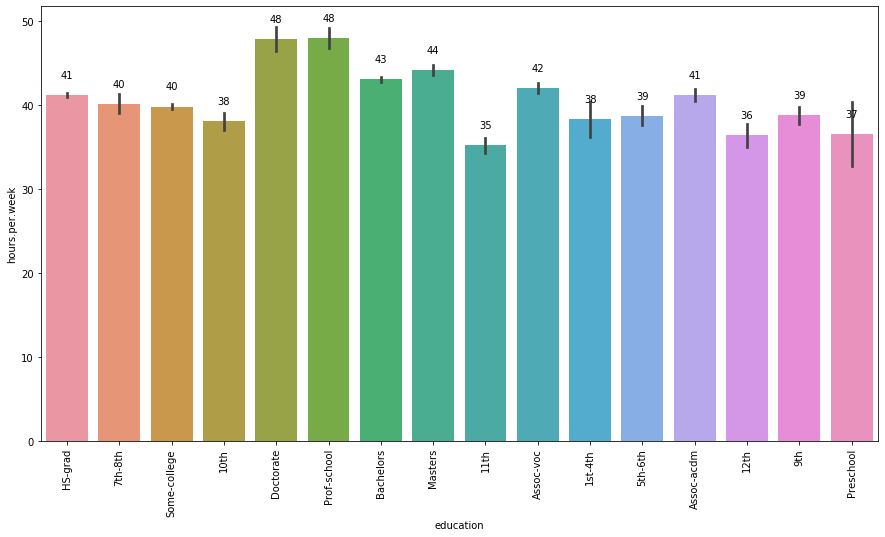

In [47]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = df['education'], y = df['hours.per.week'], data = df)
plt.xticks(rotation = 90)
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.0f}'.format(height),
            ha="center") 

posx and posy should be finite values
posx and posy should be finite values


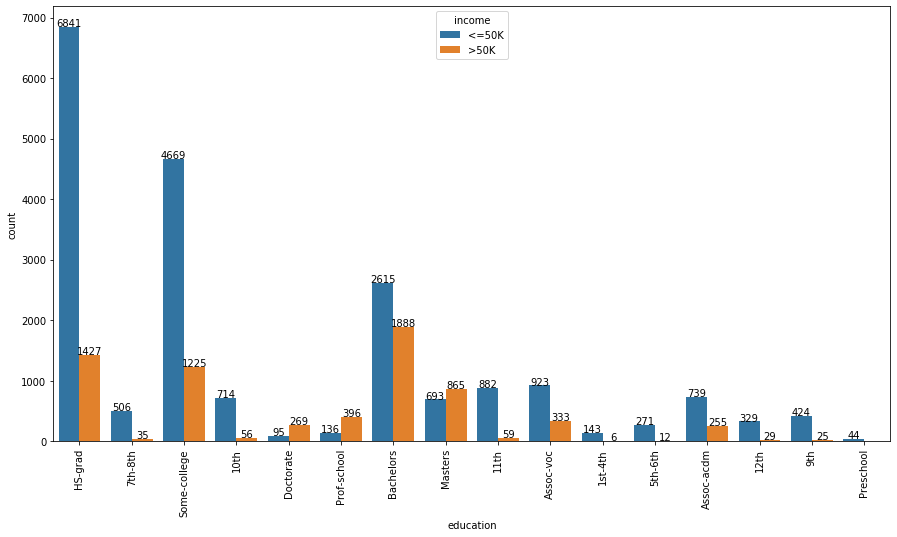

In [48]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df['education'], hue=df['income'])
plt.xticks(rotation = 90)
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.0f}'.format(height),
            ha="center") 

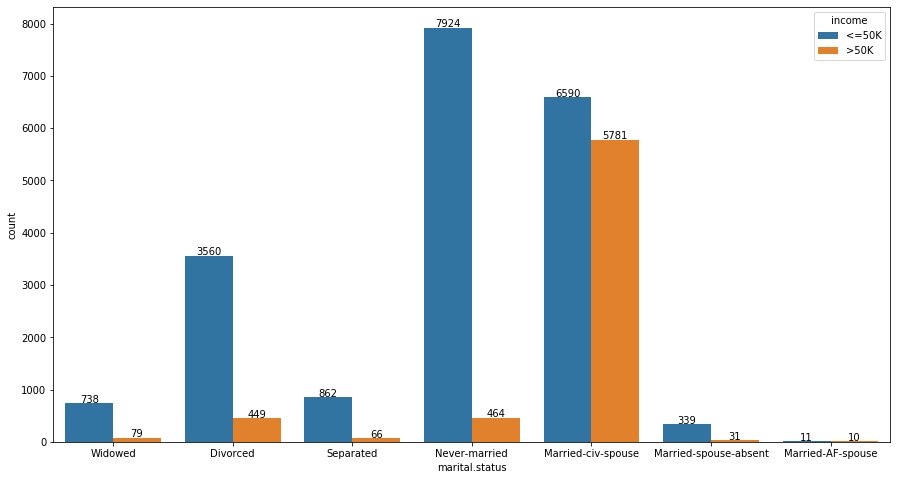

In [51]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df['marital.status'], hue=df['income'])
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.0f}'.format(height),
            ha="center") 

The maximum education years is 16
The minimum education year is 1
The average education years is 10.0


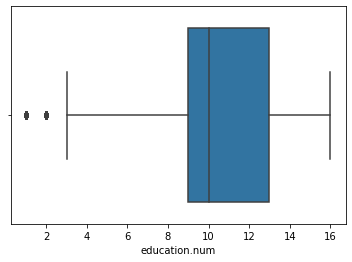

In [52]:
sns.boxplot(df['education.num'])

print ("The maximum education years is", df['education.num'].max())
print ("The minimum education year is", df['education.num'].min())
print("The average education years is", round(df['education.num'].mean(),0))

In [53]:
df.nunique()

age                72
workclass           7
education          16
education.num      16
marital.status      7
occupation         14
relationship        6
race                5
sex                 2
capital.gain      118
capital.loss       90
hours.per.week     94
native.country     41
income              2
dtype: int64

In [54]:
df.head(1)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


### Label encoding

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital.status'] = le.fit_transform(df['marital.status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native.country'] = le.fit_transform(df['native.country'])
df['income'] = le.fit_transform(df['income'])

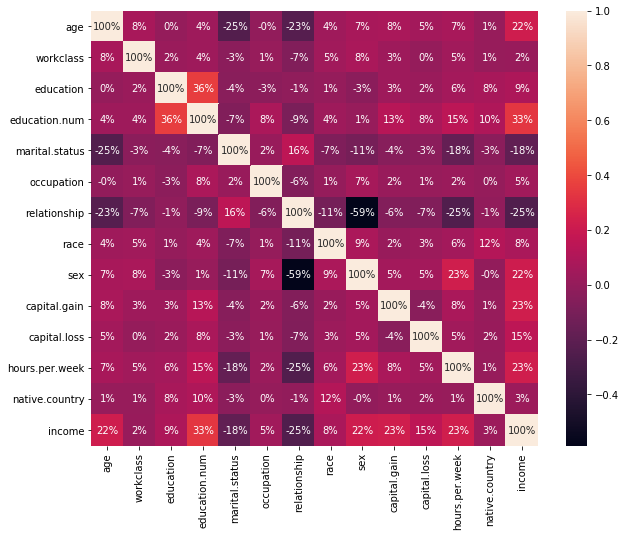

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True , fmt = '.0%')

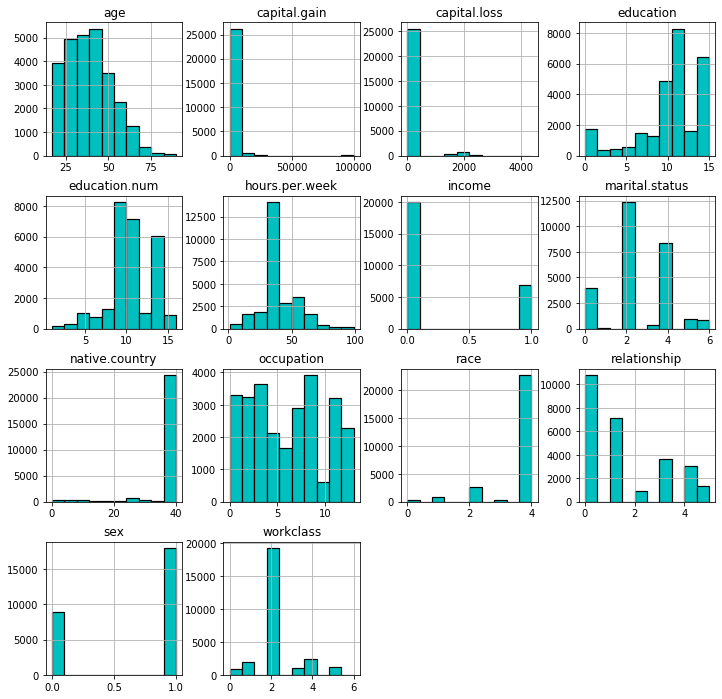

In [58]:
distribution = df.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [59]:
X = df.drop('income',axis = 1)
y = df['income']

### Splitting the dataset

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.25)

In [61]:
X_train.shape

(20178, 13)

### Standard Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Model Training

### SVM

In [63]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
predictions_svm = model.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
con_mat_svm = confusion_matrix(Y_test,predictions_svm)

#### Classification report
- It is used to measure the quality of predictions from the algorithm
- Precision : It tells us what % of our predictions were correct.(TP/(TP+FP))
- Recall : It tell us how many of the True positive were found.(TP/(TP+FN))
- F1 score: It tells us the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.
- Support : Number of samples of that class in the specified dataset.

In [69]:
print(confusion_matrix(Y_test,predictions_svm))
print('\n')
print(classification_report(Y_test,predictions_svm))

[[4696  280]
 [ 809  941]]


              precision    recall  f1-score   support

           0       0.85      0.94      0.90      4976
           1       0.77      0.54      0.63      1750

    accuracy                           0.84      6726
   macro avg       0.81      0.74      0.76      6726
weighted avg       0.83      0.84      0.83      6726



In [70]:
from sklearn.metrics import accuracy_score

In [71]:
print('Accuracy score :',accuracy_score(Y_test,predictions_svm))

Accuracy score : 0.8380909901873327


### KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [74]:
predictions_knn = knn.predict(X_test)

In [75]:
con_mat_knn = confusion_matrix(Y_test,predictions_knn)

In [76]:
print(confusion_matrix(Y_test,predictions_knn))
print('\n')
print(classification_report(Y_test,predictions_knn))

[[4586  390]
 [ 790  960]]


              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4976
           1       0.71      0.55      0.62      1750

    accuracy                           0.82      6726
   macro avg       0.78      0.74      0.75      6726
weighted avg       0.82      0.82      0.82      6726



In [77]:
print('Accuracy score :',accuracy_score(Y_test,predictions_knn))

Accuracy score : 0.8245614035087719


### Inverse Encoding using svm model predictions

In [96]:
predictions_test_svm = le.inverse_transform(predictions_svm)

In [97]:
predictions_test_svm

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype=object)

In [98]:
Y_test_svm = le.inverse_transform(Y_test)

In [99]:
Y_test_svm

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [104]:
df_predict = pd.DataFrame({'Y_test':Y_test_svm,'predictions':predictions_test_svm})

In [105]:
df_predict

,Y_test,predictions
0,<=50K,<=50K
1,<=50K,<=50K
2,<=50K,<=50K
3,<=50K,<=50K
4,<=50K,<=50K
...,...,...
6721,<=50K,<=50K
6722,<=50K,<=50K
6723,<=50K,>50K
6724,>50K,>50K


In [106]:
comparison_col = np.where(df_predict['Y_test'] == df_predict['predictions'],True,False)

In [107]:
print(comparison_col)

[ True  True  True ... False  True  True]


In [108]:
df_predict['comparison'] = comparison_col

In [109]:
df_predict

,Y_test,predictions,comparison
0,<=50K,<=50K,True
1,<=50K,<=50K,True
2,<=50K,<=50K,True
3,<=50K,<=50K,True
4,<=50K,<=50K,True
...,...,...,...
6721,<=50K,<=50K,True
6722,<=50K,<=50K,True
6723,<=50K,>50K,False
6724,>50K,>50K,True


In [117]:
df_predict['comparison'].value_counts()

True     5637
False    1089
Name: comparison, dtype: int64

In [114]:
data = df_predict[df_predict['comparison'] == False]

In [116]:
data.head()

,Y_test,predictions,comparison
9,>50K,<=50K,False
14,<=50K,>50K,False
15,>50K,<=50K,False
17,<=50K,>50K,False
19,>50K,<=50K,False
